In [1]:
import torchvision

import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import sys
if '/opt/ros/kinetic/lib/python2.7/dist-packages' in sys.path:
    sys.path.remove('/opt/ros/kinetic/lib/python2.7/dist-packages')

import cv2
import random
import os
import numpy as np
import json
from detectron2.structures import BoxMode

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer

import random
import torch 

from detectron2.data import DatasetCatalog, MetadataCatalog

import base64
import io
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from ast import literal_eval
from PIL import Image

pd.set_option('max_colwidth', 300)

from pycocotools.coco import COCO
import glob

In [2]:
categories = {'0':'Chair', '1':'Monitor', '2':'Desk'}
other_categories = {'file cabinet': 3, 'hat': 4, 'computer': 5, 'plushie': 6, 'stool': 7, 'file cabinent': 8, 'chair': 9, 'paper cup': 10, 'cardboard box': 11, 'hand sanitizer': 12, 'bags': 13, 'window': 14, 'stuffed animal': 15, 'giraffe plushie': 16, 'jacket': 17, 'bottle': 18, 'bag': 19, 'jar': 20, 'tissue box': 21, 'tissue': 22, 'cabinet': 23, 'back': 24, 'purse': 25, 'balloon': 26, 'drawer': 27, 'box lids': 28, 'backpack': 29, 'filing cabinet': 30, 'computer monitor': 31, 'paper': 32, 'white board': 33, 'dry erase board': 34, 'doll': 35, 'storage box': 36, 'cup': 37, 'box': 38, 'cereal': 39, 'inflated unicorn': 40, 'protein powder container': 41, 'clothing': 42, 'printer': 43, 'toy unicorn': 44, 'towel': 45, 'blow up unicorn': 46, 'book': 47, 'coat rack': 48, 'couch': 49, 'shoe': 50, 'luggage': 51, 'garbage can': 52, 'door': 53, 'fire hose': 54, 'unicorn': 55, 'inflatable floaty': 56, 'antenna': 57, 'headphones': 58, 'shirt': 59}

In [3]:
ssids = {'backpack': 0,
 'bag': 1,
 'unicorn plushie': 2,
 'book': 3,
 'bottle': 4,
 'cardboard box': 5,
 'file cabinet': 6,
 'cereal': 7,
 'chair': 8,
 'clothing': 9,
 'coat rack': 10,
 'monitor': 11,
 'couch': 12,
 'cup': 13,
 'desk': 14,
 'doll': 15,
 'drawer': 16,
 'dry erase board': 17,
 'fire hose': 18,
 'giraffe plushie': 19,
 'hand sanitizer': 20,
 'hat': 21,
 'headphones': 22,
 'jacket': 23,
 'jar': 24,
 'luggage': 25,
 'paper': 26,
 'paper cup': 27,
 'plushie': 28,
 'protein powder container': 29,
 'purse': 30,
 'shirt': 31,
 'shoe': 32,
 'stool': 33,
 'stuffed animal': 34,
 'tissues': 35,
 'window': 36,
 'person': 37}

In [4]:
# pp = {'stitched': 0, 'puncture-resistant': 1, 'crinkled': 2, 'pastic': 3, 'black straps': 4, 'round': 5, 'sleeves': 6, 'cotton': 7, 'eyes closed': 8, 'malleable': 9, 'flower necklace': 10, 'bendy': 11, 'simple': 12, 'wearable': 13, 'dense': 14, 'rough': 15, 'happy': 16, 'rectangle screen': 17, 'green': 18, 'on rollers': 19, 'covered': 20, 'red inside': 21, 'orange': 22, 'breakable': 23, 'puffy': 24, 'marked on': 25, 'light': 26, 'symmetrical': 27, 'packaged': 28, 'taped': 29, 'cylindrical': 30, 'folded': 31, 'clean': 32, 'fluffy': 33, 'circular': 34, 'sturdy': 35, 'transparent': 36, 'white body': 37, 'white accent': 38, 'soft fabric': 39, 'metla': 40, 'bright': 41, 'has water in it': 42, 'marked': 43, 'white paper': 44, 'paper': 45, 'face': 46, 'teal color': 47, 'portable': 48, 'closed': 49, 'foldable': 50, 'moveable': 51, 'blue stripes': 52, 'black': 53, 'insulated': 54, 'printed': 55, 'brown color': 56, 'plush': 57, 'labeled': 58, 'delicate': 59, 'grey body': 60, 'subdued': 61, 'flexible': 62, 'brown straps': 63, 'useful': 64, 'stout': 65, 'has hood': 66, 'cardboard': 67, 'fuzzy': 68, 'purple': 69, 'back straps': 70, 'stuffed': 71, 'limp': 72, 'crunchy': 73, '3-dimensional': 74, 'white color': 75, 'rigid': 76, 'dark grey': 77, 'pink accent': 78, 'multi-colored': 79, 'zipper': 80, 'metallic': 81, 'open top': 82, 'strong': 83, 'warm': 84, 'thick': 85, 'patterned': 86, 'steel': 87, 'box': 88, 'kelloggs': 89, '4 wheels': 90, 'black inside': 91, 'colorful tail': 92, 'square': 93, 'black nose': 94, 'long': 95, 'wheeled': 96, 'artwork on the back': 97, 'stickered': 98, 'wearing headphones': 99, 'cube': 100, 'pointy': 101, 'rubber': 102, 'orange outside color': 103, 'upright': 104, 'rollable': 105, 'teal': 106, 'hard': 107, 'carriable': 108, 'multiple holes': 109, 'electronic': 110, 'blue color': 111, 'complex': 112, 'sharp': 113, 'leathery': 114, 'stackable': 115, 'silver': 116, 'pointed': 117, 'orange exterior': 118, 'borwn': 119, 'pink': 120, 'colorful': 121, 'wide': 122, 'flat': 123, 'over the ear': 124, 'plastic': 125, 'voluminous': 126, 'inflated': 127, 'slim': 128, 'brown spots': 129, 'dark color': 130, 'floppy': 131, 'straps': 132, 'suede material': 133, 'utilitarian': 134, 'pliable': 135, 'metal': 136, 'cold': 137, 'silky': 138, 'comfortable': 139, 'white outside': 140, 'dark-colored': 141, 'three dimensional': 142, 'tan': 143, 'apple brand': 144, 'dark': 145, 'lightweight': 146, '3 dimensional': 147, 'blue head': 148, 'grey horns': 149, 'full': 150, 'thin': 151, 'long sleeves': 152, 'in a box': 153, 'lockable': 154, 'antibacterial': 155, 'protective': 156, 'reflective': 157, 'broad': 158, 'pump': 159, 'slotted': 160, 'striped': 161, 'cup': 162, 'traveled': 163, 'clear': 164, 'curved': 165, '2 straps': 166, 'tough': 167, 'perched': 168, 'white emblem': 169, 'black exterior': 170, 'open': 171, 'squeezable': 172, 'standing': 173, 'rectangular': 174, 'concealed': 175, 'blow-up': 176, 'shiny': 177, 'mobile': 178, 'giraffe': 179, 'hood': 180, 'blue fan': 181, 'sleek': 182, 'square-shaped': 183, 'tall': 184, 'stacked': 185, 'twist lid': 186, 'transportable': 187, 'hefty': 188, 'vertical': 189, 'leather': 190, 'soft': 191, 'red': 192, 'light color': 193, 'durable': 194, 'fabric': 195, 'lustrous': 196, 'gray': 197, 'inflatable': 198, 'double-strapped': 199, 'slick': 200, 'stiff': 201, 'rectangle': 202, 'plushy': 203, 'white': 204, 'orange interior': 205, 'expensive': 206, 'grey horn': 207, 'silver cap': 208, 'basic': 209, 'mini': 210, 'structured': 211, 'painted': 212, 'resilient': 213, 'yellow': 214, 'short': 215, 'opened': 216, 'squat': 217, 'filled': 218, 'monochromatic': 219, 'decorated': 220, 'large': 221, 'strapped': 222, 'rice': 223, 'cubic': 224, 'quilted': 225, 'empty': 226, 'lid': 227, 'orange color': 228, 'horned': 229, 'glass': 230, 'grey': 231, 'brown': 232, 'has lid': 233, 'white artwork': 234, 'heavy': 235, 'brown fur': 236, 'black feet': 237, 'spots': 238, 'yellow horn': 239, 'openable': 240, 'textured': 241, 'cloth': 242, 'face on the front': 243, 'loud': 244, 'wrinkled': 245, 'spotted': 246, "picture won't load": 247, 'white text': 248, 'narrow': 249, 'brown hair': 250, 'cute': 251, 'has necklace': 252, 'firm': 253, 'black shoes': 254, 'stereo': 255, 'over-ear': 256, 'locked': 257, 'squishy': 258, 'maroon': 259, 'black eyes': 260, 'closed eyes': 261, 'multi-sectioned': 262, 'silver color': 263, 'unicorn': 264, 'opaque': 265, 'compact': 266, 'wheels': 267, 'has logo on it': 268, 'black color': 269, 'smooth': 270, 'brown sports': 271, 'horns': 272, 'hanging': 273, 'tailed': 274, 'furry': 275, 'medium-sized': 276, 'vertically-oriented': 277, 'wired': 278, 'solid': 279, 'hooded': 280, 'plain': 281, 'cubical': 282, 'blue strips': 283, 'have straps': 284, 'flimsy': 285, 'small': 286, 'has straps': 287, 'blue': 288}

In [5]:
pp = {'long': 1,
 'black': 2,
 'orange outside color': 3,
 'mobile': 4,
 'tough': 5,
 'blow-up': 6,
 'spotted': 7,
 'brown straps': 8,
 '3 dimensional': 9,
 'squat': 10,
 'colorful': 11,
 'metal': 12,
 'colorful tail': 13,
 'sleeves': 14,
 'grey horn': 15,
 'happy': 16,
 'white paper': 17,
 'folded': 18,
 'squeezable': 19,
 'floppy': 20,
 'structured': 21,
 'symmetrical': 22,
 'hefty': 23,
 'fabric': 24,
 'utilitarian': 25,
 'multi-colored': 26,
 'lockable': 27,
 'stout': 28,
 'broad': 29,
 'fluffy': 30,
 'yellow': 31,
 'simple': 32,
 'bright': 33,
 'inflatable': 34,
 'back straps': 35,
 'moveable': 36,
 'dark': 37,
 'unicorn': 38,
 'black nose': 39,
 'white emblem': 40,
 'rigid': 41,
 'plush': 42,
 'useful': 43,
 'orange exterior': 44,
 'electronic': 45,
 'sharp': 46,
 'hooded': 47,
 'kelloggs': 48,
 'light color': 49,
 'lightweight': 50,
 'puffy': 51,
 'white body': 52,
 'square-shaped': 53,
 'horns': 54,
 'wheeled': 55,
 'has water in it': 56,
 'slim': 57,
 'stackable': 58,
 'stiff': 59,
 'antibacterial': 60,
 'black exterior': 61,
 'plushy': 62,
 'striped': 63,
 'insulated': 64,
 'black inside': 65,
 'brown color': 66,
 'inflated': 67,
 'standing': 68,
 'vertical': 69,
 'quilted': 70,
 'hood': 71,
 'brown': 72,
 'puncture-resistant': 73,
 'brown sports': 74,
 'twist lid': 75,
 'heavy': 76,
 'red': 77,
 'metla': 78,
 'empty': 79,
 'taped': 80,
 'flimsy': 81,
 'green': 82,
 'opaque': 83,
 'white color': 84,
 'pastic': 85,
 'glass': 86,
 'black straps': 87,
 'portable': 88,
 'silver cap': 89,
 'pointed': 90,
 'borwn': 91,
 'wide': 92,
 'medium-sized': 93,
 'warm': 94,
 'stereo': 95,
 'basic': 96,
 'smooth': 97,
 'has logo on it': 98,
 'tan': 99,
 'complex': 100,
 'short': 101,
 'red inside': 102,
 'pump': 103,
 'slotted': 104,
 'leather': 105,
 'breakable': 106,
 'voluminous': 107,
 'mini': 108,
 'purple': 109,
 'vertically-oriented': 110,
 'transparent': 111,
 'wearing headphones': 112,
 'maroon': 113,
 'thin': 114,
 'cute': 115,
 'transportable': 116,
 'rollable': 117,
 'covered': 118,
 'locked': 119,
 'have straps': 120,
 'curved': 121,
 'loud': 122,
 'furry': 123,
 'open': 124,
 'shiny': 125,
 'plastic': 126,
 'flat': 127,
 'blue strips': 128,
 'crunchy': 129,
 'thick': 130,
 'orange': 131,
 'black color': 132,
 'black feet': 133,
 'blue color': 134,
 'solid': 135,
 'multiple holes': 136,
 'wired': 137,
 'box': 138,
 'horned': 139,
 'protective': 140,
 'delicate': 141,
 'has straps': 142,
 'wheels': 143,
 'malleable': 144,
 'narrow': 145,
 'limp': 146,
 'cardboard': 147,
 'packaged': 148,
 'light': 149,
 'sleek': 150,
 'dark grey': 151,
 'closed': 152,
 'marked': 153,
 'plain': 154,
 'white artwork': 155,
 'teal': 156,
 'cotton': 157,
 'orange color': 158,
 'pointy': 159,
 'teal color': 160,
 '2 straps': 161,
 'blue fan': 162,
 'pink': 163,
 'foldable': 164,
 'cubical': 165,
 '3-dimensional': 166,
 'clean': 167,
 'perched': 168,
 'blue': 169,
 'soft': 170,
 'soft fabric': 171,
 'fuzzy': 172,
 'bendy': 173,
 'cloth': 174,
 'stacked': 175,
 'metallic': 176,
 'strong': 177,
 'brown spots': 178,
 'suede material': 179,
 'sturdy': 180,
 'compact': 181,
 'small': 182,
 'durable': 183,
 'round': 184,
 'dark color': 185,
 'textured': 186,
 'wearable': 187,
 'silky': 188,
 'marked on': 189,
 'silver color': 190,
 'labeled': 191,
 'dark-colored': 192,
 'rectangle screen': 193,
 'black eyes': 194,
 'blue stripes': 195,
 'reflective': 196,
 'flower necklace': 197,
 'white outside': 198,
 'full': 199,
 'subdued': 200,
 'white': 201,
 'brown fur': 202,
 'over-ear': 203,
 'closed eyes': 204,
 'clear': 205,
 'expensive': 206,
 'squishy': 207,
 'monochromatic': 208,
 'pink accent': 209,
 'white accent': 210,
 'tailed': 211,
 'face': 212,
 'printed': 213,
 'rectangle': 214,
 'artwork on the back': 215,
 'on rollers': 216,
 'painted': 217,
 'apple brand': 218,
 'cylindrical': 219,
 'stitched': 220,
 'silver': 221,
 'large': 222,
 'upright': 223,
 'stuffed': 224,
 'patterned': 225,
 'pliable': 226,
 'orange interior': 227,
 'lid': 228,
 'face on the front': 229,
 'lustrous': 230,
 'in a box': 231,
 'cube': 232,
 'has necklace': 233,
 'grey horns': 234,
 'yellow horn': 235,
 'wrinkled': 236,
 'tall': 237,
 'has lid': 238,
 'concealed': 239,
 'blue head': 240,
 'leathery': 241,
 'steel': 242,
 'eyes closed': 243,
 'over the ear': 244,
 'circular': 245,
 'comfortable': 246,
 'zipper': 247,
 'paper': 248,
 'hanging': 249,
 'resilient': 250,
 'rubber': 251,
 'long sleeves': 252,
 'rectangular': 253,
 'slick': 254,
 'grey': 255,
 'three dimensional': 256,
 'double-strapped': 257,
 'white text': 258,
 'hard': 259,
 'strapped': 260,
 'multi-sectioned': 261,
 '4 wheels': 262,
 'rough': 263,
 'black shoes': 264,
 'brown hair': 265,
 'cup': 266,
 'cold': 267,
 'stickered': 268,
 'grey body': 269,
 'gray': 270,
 'open top': 271,
 'crinkled': 272,
 'cubic': 273,
 'has hood': 274,
 'filled': 275,
 'firm': 276,
 'decorated': 277,
 'spots': 278,
 'openable': 279,
 'flexible': 280,
 'straps': 281,
 'dense': 282,
 'traveled': 283,
 'rice': 284,
 'giraffe': 285,
 'opened': 286,
 'square': 287,
 'carriable': 288,
 'mesh-rear': 289,
 'wood': 290}

In [6]:
# for k, v in pp.items():
#     pp[k] = pp[k]+1

for k, v in pp.items():
    print("{}, {} ".format(k,v))

long, 1 
black, 2 
orange outside color, 3 
mobile, 4 
tough, 5 
blow-up, 6 
spotted, 7 
brown straps, 8 
3 dimensional, 9 
squat, 10 
colorful, 11 
metal, 12 
colorful tail, 13 
sleeves, 14 
grey horn, 15 
happy, 16 
white paper, 17 
folded, 18 
squeezable, 19 
floppy, 20 
structured, 21 
symmetrical, 22 
hefty, 23 
fabric, 24 
utilitarian, 25 
multi-colored, 26 
lockable, 27 
stout, 28 
broad, 29 
fluffy, 30 
yellow, 31 
simple, 32 
bright, 33 
inflatable, 34 
back straps, 35 
moveable, 36 
dark, 37 
unicorn, 38 
black nose, 39 
white emblem, 40 
rigid, 41 
plush, 42 
useful, 43 
orange exterior, 44 
electronic, 45 
sharp, 46 
hooded, 47 
kelloggs, 48 
light color, 49 
lightweight, 50 
puffy, 51 
white body, 52 
square-shaped, 53 
horns, 54 
wheeled, 55 
has water in it, 56 
slim, 57 
stackable, 58 
stiff, 59 
antibacterial, 60 
black exterior, 61 
plushy, 62 
striped, 63 
insulated, 64 
black inside, 65 
brown color, 66 
inflated, 67 
standing, 68 
vertical, 69 
quilted, 70 
hood, 7

In [7]:
# list(pp.keys())

## Detectron2 Training Code

In [8]:

DatasetCatalog.clear()

# other_categories = {'file cabinet': 3, 'hat': 4, 'computer': 5, 'plushie': 6, 'stool': 7, 'file cabinent': 8, 'chair': 9, 'paper cup': 10, 'cardboard box': 11, 'hand sanitizer': 12, 'bags': 13, 'window': 14, 'stuffed animal': 15, 'giraffe plushie': 16, 'jacket': 17, 'bottle': 18, 'bag': 19, 'jar': 20, 'tissue box': 21, 'tissue': 22, 'cabinet': 23, 'back': 24, 'purse': 25, 'balloon': 26, 'drawer': 27, 'box lids': 28, 'backpack': 29, 'filing cabinet': 30, 'computer monitor': 31, 'paper': 32, 'white board': 33, 'dry erase board': 34, 'doll': 35, 'storage box': 36, 'cup': 37, 'box': 38, 'cereal': 39, 'inflated unicorn': 40, 'protein powder container': 41, 'clothing': 42, 'printer': 43, 'toy unicorn': 44, 'towel': 45, 'blow up unicorn': 46, 'book': 47, 'coat rack': 48, 'couch': 49, 'shoe': 50, 'luggage': 51, 'garbage can': 52, 'door': 53, 'fire hose': 54, 'unicorn': 55, 'inflatable floaty': 56, 'antenna': 57, 'headphones': 58, 'shirt': 59}

img_dir = '/home/locobotm/images2/'
botfiles = glob.glob(img_dir+'botcapture*.jpg')
random.shuffle(botfiles)
files = glob.glob(img_dir+'[!botcapture]*.jpg')
random.shuffle(files)

def slc(files, set_name, pct):
    l = int(pct*len(files))
    return files[-l:] if set_name == 'Val' else files[:-l]

In [9]:
train_files = slc(botfiles, 'Train', 0.1) + slc(files, 'Train', 0.25)
val_files = slc(botfiles, 'Val', 0.1) + slc(files, 'Val', 0.25)

print("number of files {}, train_size {}, val_size {}".format(len(files), len(train_files), len(val_files)))

all_property_classes = ['none'] + list(pp.keys())
num_property_classes = len(all_property_classes)
print("Total classes {}".format(len(all_property_classes)))

number of files 137, train_size 178, val_size 42
Total classes 291


In [10]:
def get_class_weights():
    json_file = os.path.join("other_annotations9.json")
    with open(json_file) as f:
        ia = json.load(f)
    
    cts = {}
    for _, a in enumerate(ia):
        for x in a['properties']:
            if x in cts:
                cts[x] = cts[x] + 1
            else:
                cts[x] = 1
                
    tot = sum(list(cts.values()))
#     all_c = 291
    print("tot {}".format(tot))
    wts = []
    for k, v in cts.items():
        cts[k] = tot/(cts[k]*291)
    
    tt = torch.zeros([max(list(cts.keys()))+1])
    
    for k, v in cts.items():
#         print("{}, {} ".format(k,v))
        tt[k] = cts[k]
    return tt
#     wts = [0]
#     print(min(list(cts.keys())), max(list(cts.keys())))
    
#     ll = list(cts.keys())
#     ll.sort()
    
#     print(ll)
#     for i in range(len(list(cts.keys()))):
#         wts.append(cts[i+1])
#     return torch.tensor(wts)
#     print(cts)

# print(list(pp.keys()))
d = get_class_weights()
# for c, w in zip(list(pp.keys()), d):
#     print(c, w.item())
print(d)
# print(len(list(d.keys())))

tot 7376
tensor([ 0.0000,  5.0694,  0.1168, 25.3471,  1.4082,  2.8163, 12.6735,  4.2245,
         3.6210,  6.3368, 12.6735,  2.8163,  2.5347, 25.3471, 12.6735,  6.3368,
        12.6735, 12.6735,  6.3368,  6.3368,  4.2245,  8.4490,  6.3368, 25.3471,
         6.3368,  8.4490,  4.2245, 12.6735, 12.6735, 12.6735,  8.4490, 12.6735,
         8.4490,  6.3368,  4.2245, 12.6735,  0.0766,  2.8163, 12.6735,  8.4490,
         6.3368,  1.2674,  2.8163,  6.3368, 12.6735,  0.0512, 12.6735, 25.3471,
        25.3471,  1.4910,  0.5761,  8.4490, 25.3471, 12.6735, 12.6735,  0.0718,
        12.6735, 25.3471,  6.3368,  1.2070, 25.3471, 12.6735, 12.6735, 12.6735,
         5.0694, 12.6735,  2.5347, 12.6735, 12.6735, 25.3471, 25.3471, 25.3471,
         0.3673, 12.6735, 12.6735, 12.6735,  1.4910,  3.1684, 25.3471,  5.0694,
         5.0694,  4.2245,  4.2245,  1.5842,  2.5347, 12.6735, 25.3471,  6.3368,
         3.1684, 12.6735,  4.2245, 12.6735,  8.4490, 12.6735,  1.5842, 12.6735,
         6.3368,  0.8740, 12.67

In [11]:
from sklearn.utils import class_weight
class_weight.compute_class_weight?

Signature: class_weight.compute_class_weight(class_weight, classes, y)
Docstring:
Estimate class weights for unbalanced datasets.

Parameters
----------
class_weight : dict, 'balanced' or None
    If 'balanced', class weights will be given by
    ``n_samples / (n_classes * np.bincount(y))``.
    If a dictionary is given, keys are classes and values
    are corresponding class weights.
    If None is given, the class weights will be uniform.

classes : ndarray
    Array of the classes occurring in the data, as given by
    ``np.unique(y_org)`` with ``y_org`` the original class labels.

y : array-like, shape (n_samples,)
    Array of original class labels per sample;

Returns
-------
class_weight_vect : ndarray, shape (n_classes,)
    Array with class_weight_vect[i] the weight for i-th class

References
----------
The "balanced" heuristic is inspired by
Logistic Regression in Rare Events Data, King, Zen, 2001.
File:      ~/anaconda3/envs/pyvision/lib/python3.7/site-packages/sklearn/utils

38
number of files 178
<class 'numpy.ndarray'> (240, 320, 3)


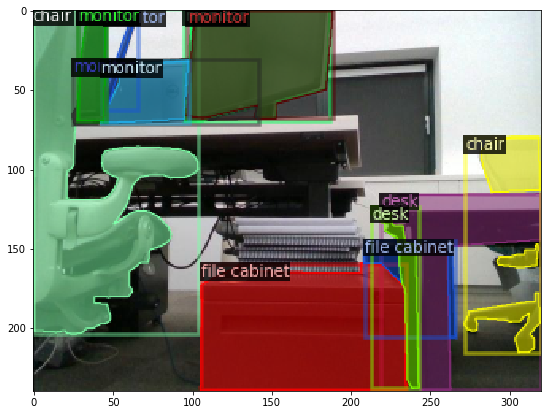

<class 'numpy.ndarray'> (240, 320, 3)


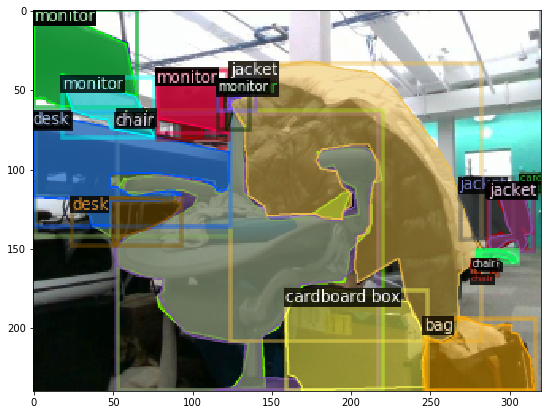

<class 'numpy.ndarray'> (240, 320, 3)


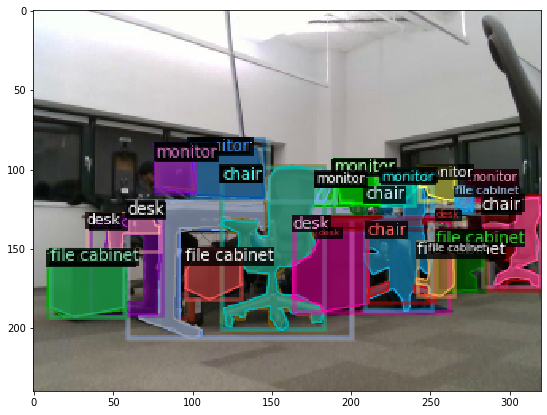

<class 'numpy.ndarray'> (240, 320, 3)


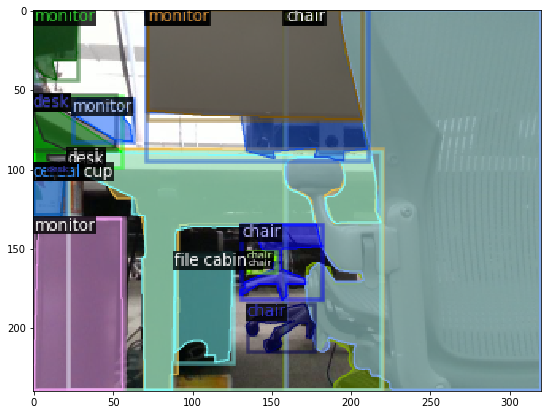

<class 'numpy.ndarray'> (240, 320, 3)


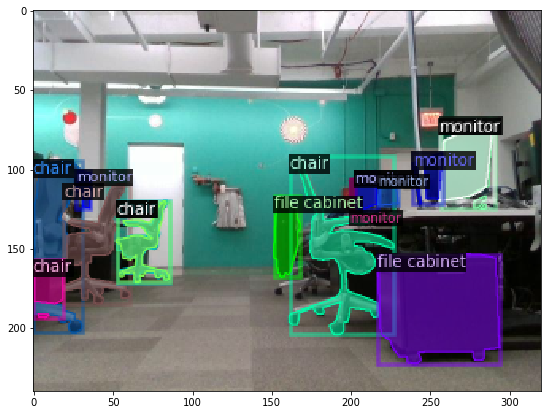

In [12]:
import random

def get_dataset_dicts(set_name):
    json_file = os.path.join("other_annotations9.json")
#     json_file = 'coco_loco_annotations2.json'
 
    with open(json_file) as f:
        imgs_anns = json.load(f)
#         print(imgs_anns[0])

    dataset_dicts = []
    files = train_files if set_name == 'train' else val_files
    print("number of files {}".format(len(files)))
    for idx, filepath in enumerate(files):
        record = {}
        height, width = cv2.imread(filepath).shape[:2]
        record["file_name"] = filepath
        record["image_id"] = idx
        record["height"] = height
        record["width"] = width
        filename = filepath.split('/')[-1]
        objs = []
        keep_rec = False
        for _, anno in enumerate(imgs_anns):
#             print('anno {}'.format(anno))
            if anno['image_id'] == filename or str(anno['image_id'])+'.jpg' == filename:
                keep_rec = True
                obj = {
                    "bbox": anno['bbox'],
                    "bbox_mode": BoxMode.XYXY_ABS,
                    "segmentation": anno['segmentation'],
                    "category_id": anno['category_id'],
                    "iscrowd": 0,
                    "properties": torch.tensor([x for x in anno['properties']]).long()
#                     "properties": torch.tensor([x+1 if x!= 218 else 0 for p in anno['properties']]).long() #torch.randint(1, num_property_classes, (random.randint(1,num_property_classes),)) # property_id 
                }
                objs.append(obj)

        record["annotations"] = objs
        if keep_rec:
            dataset_dicts.append(record)
    return dataset_dicts
    
# cat = list(categories.values()) + list(other_categories.keys())
# print(len(cat), other_categories)

prefix = "detect8_"
train_data = prefix+'train'
test_data = prefix+'val'

for d in ["train", "val"]:
    DatasetCatalog.register(prefix+d, lambda d = d: get_dataset_dicts(d))
    MetadataCatalog.get(prefix+d).set(thing_classes=list(ssids.keys()))
    MetadataCatalog.get(prefix+d).set(property_classes=all_property_classes)

x = len(MetadataCatalog.get(train_data).get("thing_classes"))
print(x)

MetadataCatalog.get(train_data).get("thing_classes", None)

import matplotlib
matplotlib.rcParams['figure.figsize'] = (20, 7.0)
from detectron2.utils.visualizer import Visualizer
dataset_dicts = get_dataset_dicts('train')
for d in random.sample(dataset_dicts, 5):
#     print(d)
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=MetadataCatalog.get(train_data), scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    img = vis.get_image()[:, :, ::-1]
    print(type(img), img.shape)
    plt.imshow(img)
    plt.show()
#     cv2.imshow("img", )

from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg

coco_yaml = "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
lvis_yaml = "LVIS-InstanceSegmentation/mask_rcnn_R_50_FPN_1x.yaml"
lvis_yaml2 = "LVIS-InstanceSegmentation/mask_rcnn_R_101_FPN_1x.yaml"
pano_yaml = "COCO-PanopticSegmentation/panoptic_fpn_R_50_3x.yaml"

In [13]:
# -*- coding = utf-8 -*-
# Copyright (c) Facebook, Inc. and its affiliates. All Rights Reserved

from detectron2.config import CfgNode as CN


def add_property_config(cfg):
    """
    Add config for densepose head.
    """
    _C = cfg

    _C.MODEL.DENSEPOSE_ON = True

    _C.MODEL.ROI_PROPERTY_HEAD = CN()
    _C.MODEL.ROI_PROPERTY_HEAD.NAME = ""
    _C.MODEL.ROI_PROPERTY_HEAD.NUM_CLASSES = 8
#     # Number of parts used for point labels
#     _C.MODEL.ROI_DENSEPOSE_HEAD.NUM_PATCHES = 24
#     _C.MODEL.ROI_DENSEPOSE_HEAD.DECONV_KERNEL = 4
#     _C.MODEL.ROI_DENSEPOSE_HEAD.CONV_HEAD_DIM = 512
#     _C.MODEL.ROI_DENSEPOSE_HEAD.CONV_HEAD_KERNEL = 3
#     _C.MODEL.ROI_DENSEPOSE_HEAD.UP_SCALE = 2
#     _C.MODEL.ROI_DENSEPOSE_HEAD.HEATMAP_SIZE = 112
#     _C.MODEL.ROI_DENSEPOSE_HEAD.POOLER_TYPE = "ROIAlignV2"
#     _C.MODEL.ROI_DENSEPOSE_HEAD.POOLER_RESOLUTION = 28
#     _C.MODEL.ROI_DENSEPOSE_HEAD.POOLER_SAMPLING_RATIO = 2
#     _C.MODEL.ROI_DENSEPOSE_HEAD.NUM_COARSE_SEGM_CHANNELS = 2  # 15 or 2
#     # Overlap threshold for an RoI to be considered foreground (if >= FG_IOU_THRESHOLD)
#     _C.MODEL.ROI_DENSEPOSE_HEAD.FG_IOU_THRESHOLD = 0.7
#     # Loss weights for annotation masks.(14 Parts)
#     _C.MODEL.ROI_DENSEPOSE_HEAD.INDEX_WEIGHTS = 5.0
#     # Loss weights for surface parts. (24 Parts)
#     _C.MODEL.ROI_DENSEPOSE_HEAD.PART_WEIGHTS = 1.0
#     # Loss weights for UV regression.
#     _C.MODEL.ROI_DENSEPOSE_HEAD.POINT_REGRESSION_WEIGHTS = 0.01
#     # For Decoder
#     _C.MODEL.ROI_DENSEPOSE_HEAD.DECODER_ON = True
#     _C.MODEL.ROI_DENSEPOSE_HEAD.DECODER_NUM_CLASSES = 256
#     _C.MODEL.ROI_DENSEPOSE_HEAD.DECODER_CONV_DIMS = 256
#     _C.MODEL.ROI_DENSEPOSE_HEAD.DECODER_NORM = ""
#     _C.MODEL.ROI_DENSEPOSE_HEAD.DECODER_COMMON_STRIDE = 4
#     # For DeepLab head
#     _C.MODEL.ROI_DENSEPOSE_HEAD.DEEPLAB = CN()
#     _C.MODEL.ROI_DENSEPOSE_HEAD.DEEPLAB.NORM = "GN"
#     _C.MODEL.ROI_DENSEPOSE_HEAD.DEEPLAB.NONLOCAL_ON = 0
#     # Confidences
#     # Enable learning confidences (variances) along with the actual values
#     _C.MODEL.ROI_DENSEPOSE_HEAD.UV_CONFIDENCE = CN({"ENABLED": False})
#     # UV confidence lower bound
#     _C.MODEL.ROI_DENSEPOSE_HEAD.UV_CONFIDENCE.EPSILON = 0.01
#     # Statistical model type for confidence learning, possible values:
#     # - "iid_iso": statistically independent identically distributed residuals
#     #    with isotropic covariance
#     # - "indep_aniso": statistically independent residuals with anisotropic
#     #    covariances
#     _C.MODEL.ROI_DENSEPOSE_HEAD.UV_CONFIDENCE.TYPE = "iid_iso"


In [14]:
cfg = get_cfg()
add_property_config(cfg)
cfg.merge_from_file(model_zoo.get_config_file(lvis_yaml2))
cfg.DATASETS.TRAIN = (train_data,)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(lvis_yaml2)  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.005  # pick a good LR
cfg.SOLVER.MAX_ITER = 400    # 300 iterations seems good enough for this toy dataset; you may need to train longer for a practical dataset
# cfg.MODEL.ROI_HEADS.NAME = "Res5ROIHeads"
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128  # faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = len(MetadataCatalog.get(train_data).get("thing_classes"))  # only has one class (ballon)
# cfg.MODEL.ROI_PROPERTY_HEAD = "BasePropertiesRCNNHead"
cfg.MODEL.ROI_PROPERTY_HEAD.NUM_CLASSES = num_property_classes

# print(cfg.MODEL.dump().split('\n'))

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

# Look at training curves in tensorboard:
%load_ext tensorboard
%tensorboard --logdir output

[04/07 14:20:24 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

'roi_heads.box_predictor.cls_score.weight' has shape (1231, 1024) in the checkpoint but (39, 1024) in the model! Skipped.
'roi_heads.box_predictor.cls_score.bias' has shape (1231,) in the checkpoint but (39,) in the model! Skipped.
'roi_heads.box_predictor.bbox_pred.weight' has shape (4920, 1024) in the checkpoint but (152, 1024) in the model! Skipped.
'roi_heads.box_predictor.bbox_pred.bias' has shape (4920,) in the checkpoint but (152,) in the model! Skipped.
'roi_heads.mask_head.predictor.weight' has shape (1230, 256, 1, 1) in the checkpoint but (38, 256, 1, 1) in the model! Skipped.
'roi_heads.mask_head.predictor.bias' has shape (1230,) in the checkpoint but (38,) in the model! Skipped.


[04/07 14:20:25 d2.engine.train_loop]: Starting training from iteration 0
[04/07 14:20:32 d2.utils.events]:  eta: 0:02:20  iter: 19  total_loss: 8.534  loss_cls: 3.026  loss_box_reg: 0.783  loss_mask: 0.672  loss_prop_v2: 3.476  loss_rpn_cls: 0.189  loss_rpn_loc: 0.146  time: 0.3740  data_time: 0.0226  lr: 0.000100  max_mem: 3286M
[04/07 14:20:40 d2.utils.events]:  eta: 0:02:15  iter: 39  total_loss: 7.109  loss_cls: 1.394  loss_box_reg: 0.794  loss_mask: 0.572  loss_prop_v2: 3.849  loss_rpn_cls: 0.131  loss_rpn_loc: 0.174  time: 0.3782  data_time: 0.0153  lr: 0.000200  max_mem: 3286M
[04/07 14:20:48 d2.utils.events]:  eta: 0:02:06  iter: 59  total_loss: 5.457  loss_cls: 0.889  loss_box_reg: 0.787  loss_mask: 0.468  loss_prop_v2: 2.791  loss_rpn_cls: 0.133  loss_rpn_loc: 0.172  time: 0.3752  data_time: 0.0152  lr: 0.000300  max_mem: 3286M
[04/07 14:20:55 d2.utils.events]:  eta: 0:01:59  iter: 79  total_loss: 4.746  loss_cls: 0.781  loss_box_reg: 0.772  loss_mask: 0.424  loss_prop_v2: 2

Reusing TensorBoard on port 6006 (pid 14242), started 9 days, 22:17:37 ago. (Use '!kill 14242' to kill it.)

number of files 42


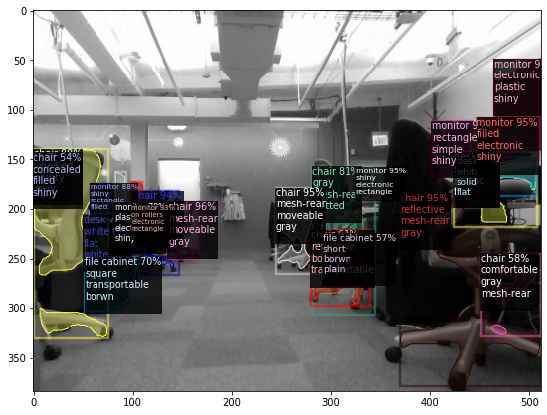

botcapture_OCkKxn.jpg /home/locobotm/notebooks/iout3/botcapture_OCkKxn.jpg


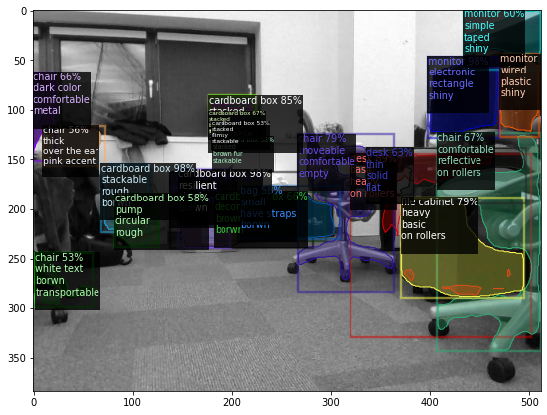

botcapture_T4WVBi.jpg /home/locobotm/notebooks/iout3/botcapture_T4WVBi.jpg


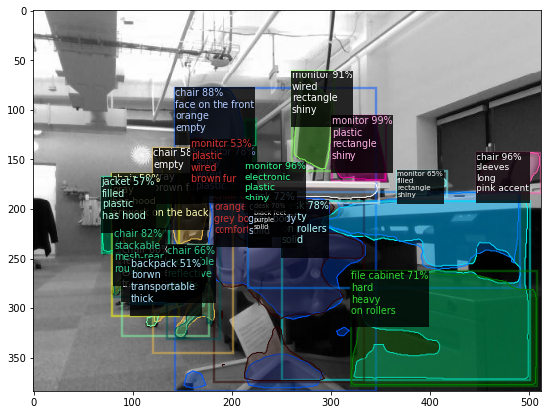

botcapture_O_At0H.jpg /home/locobotm/notebooks/iout3/botcapture_O_At0H.jpg


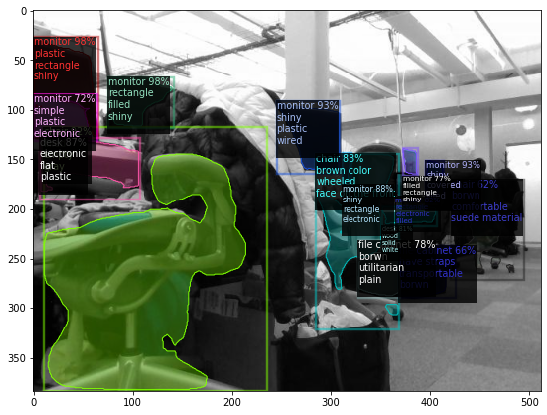

botcapture_iFTWEs.jpg /home/locobotm/notebooks/iout3/botcapture_iFTWEs.jpg


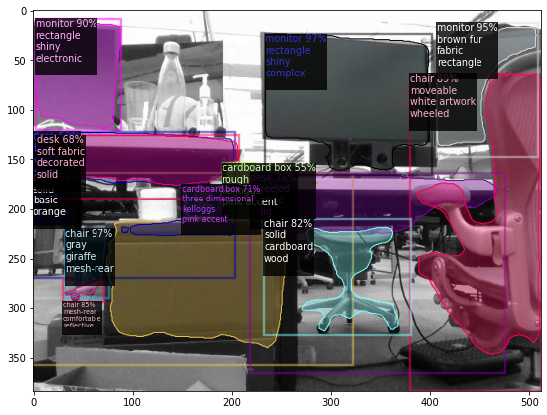

botcapture_YrYJRP.jpg /home/locobotm/notebooks/iout3/botcapture_YrYJRP.jpg


In [15]:
test_data = prefix+'val'

cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set the testing threshold for this model
cfg.DATASETS.TEST = (test_data, )
predictor = DefaultPredictor(cfg)

from detectron2.utils.visualizer import ColorMode

def visualize(filename):
    im = cv2.imread(filename)
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=MetadataCatalog.get(train_data), 
                   scale=0.8, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    plt.imshow(v.get_image()[:, :, ::-1])
    plt.show()
    wpth = '/home/locobotm/notebooks/iout3/'+filename.split('/')[-1]
    print(filename.split('/')[-1], wpth)
    cv2.imwrite(wpth, v.get_image()[:, :, ::-1])

dataset_dicts = get_dataset_dicts('val')

for d in dataset_dicts:
#     print(d['file_name'])
    if 'botcapture' in d['file_name']:
        visualize(d['file_name'])

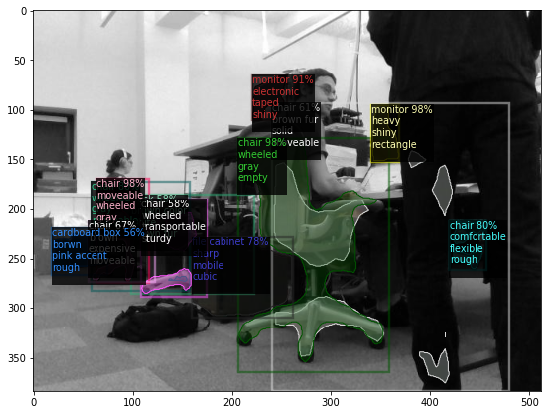

botcapture_wpkJVA.jpg /home/locobotm/notebooks/iout3/botcapture_wpkJVA.jpg


In [16]:
visualize('/home/locobotm/images2/botcapture_wpkJVA.jpg')

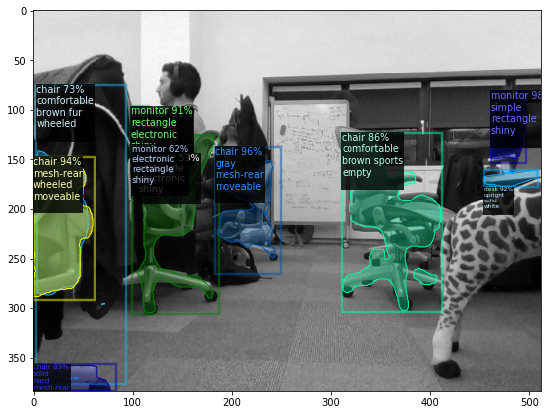

botcapture_7c_rVj.jpg /home/locobotm/notebooks/iout3/botcapture_7c_rVj.jpg


In [17]:
visualize('/home/locobotm/images2/botcapture_7c_rVj.jpg')

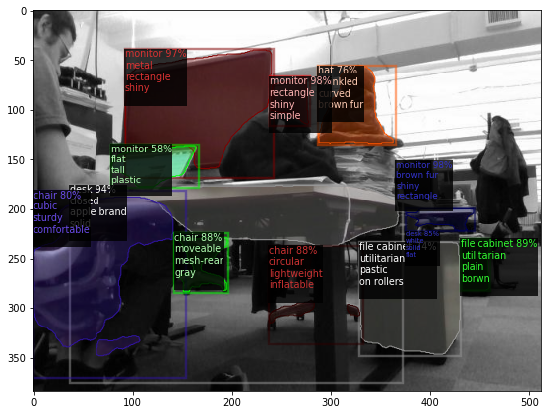

botcapture_1FZxE7.jpg /home/locobotm/notebooks/iout3/botcapture_1FZxE7.jpg


In [18]:
visualize('/home/locobotm/images2/botcapture_1FZxE7.jpg')

In [19]:
cc = cfg.SOLVER.dump().split('\n')
cc

['BASE_LR: 0.005',
 'BIAS_LR_FACTOR: 1.0',
 'CHECKPOINT_PERIOD: 5000',
 'CLIP_GRADIENTS:',
 '  CLIP_TYPE: value',
 '  CLIP_VALUE: 1.0',
 '  ENABLED: false',
 '  NORM_TYPE: 2.0',
 'GAMMA: 0.1',
 'IMS_PER_BATCH: 2',
 'LR_SCHEDULER_NAME: WarmupMultiStepLR',
 'MAX_ITER: 400',
 'MOMENTUM: 0.9',
 'STEPS:',
 '- 60000',
 '- 80000',
 'WARMUP_FACTOR: 0.001',
 'WARMUP_ITERS: 1000',
 'WARMUP_METHOD: linear',
 'WEIGHT_DECAY: 0.0001',
 'WEIGHT_DECAY_BIAS: 0.0001',
 'WEIGHT_DECAY_NORM: 0.0',
 '']

In [20]:
detectron2.__file__

'/home/locobotm/detectron2/detectron2/__init__.py'

In [21]:
get_cfg().MODEL.dump().split('\n')

['ANCHOR_GENERATOR:',
 '  ANGLES:',
 '  - - -90',
 '    - 0',
 '    - 90',
 '  ASPECT_RATIOS:',
 '  - - 0.5',
 '    - 1.0',
 '    - 2.0',
 '  NAME: DefaultAnchorGenerator',
 '  OFFSET: 0.0',
 '  SIZES:',
 '  - - 32',
 '    - 64',
 '    - 128',
 '    - 256',
 '    - 512',
 'BACKBONE:',
 '  FREEZE_AT: 2',
 '  NAME: build_resnet_backbone',
 'DEVICE: cuda',
 'FPN:',
 '  FUSE_TYPE: sum',
 '  IN_FEATURES: []',
 "  NORM: ''",
 '  OUT_CHANNELS: 256',
 'KEYPOINT_ON: false',
 'LOAD_PROPOSALS: false',
 'MASK_ON: false',
 'META_ARCHITECTURE: GeneralizedRCNN',
 'PANOPTIC_FPN:',
 '  COMBINE:',
 '    ENABLED: true',
 '    INSTANCES_CONFIDENCE_THRESH: 0.5',
 '    OVERLAP_THRESH: 0.5',
 '    STUFF_AREA_LIMIT: 4096',
 '  INSTANCE_LOSS_WEIGHT: 1.0',
 'PIXEL_MEAN:',
 '- 103.53',
 '- 116.28',
 '- 123.675',
 'PIXEL_STD:',
 '- 1.0',
 '- 1.0',
 '- 1.0',
 'PROPOSAL_GENERATOR:',
 '  MIN_SIZE: 0',
 '  NAME: RPN',
 'RESNETS:',
 '  DEFORM_MODULATED: false',
 '  DEFORM_NUM_GROUPS: 1',
 '  DEFORM_ON_PER_STAGE:',
 ' 